<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/DP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce

In [2]:
#%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/sao-paulo-properties-april-2019.csv')

In [5]:
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [6]:
list(data.columns)

['Price',
 'Condo',
 'Size',
 'Rooms',
 'Toilets',
 'Suites',
 'Parking',
 'Elevator',
 'Furnished',
 'Swimming Pool',
 'New',
 'District',
 'Negotiation Type',
 'Property Type',
 'Latitude',
 'Longitude']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [8]:
data_num = data.select_dtypes(include = ['float64', 'int64']) 
data_num.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,-23.525025,-46.482436


In [9]:
corr_data = data_num.corr()['Price'][:-1]
correlated_features_list = corr_data[abs(corr_data) > 0.2].sort_values(ascending=False)
print("There are {} strongly values with SalePrice:\n{}".format(len(correlated_features_list), 
                                                                          correlated_features_list))

There are 7 strongly values with SalePrice:
Price      1.000000
Size       0.378450
Toilets    0.341887
Parking    0.337959
Suites     0.313267
Rooms      0.272267
Condo      0.203857
Name: Price, dtype: float64


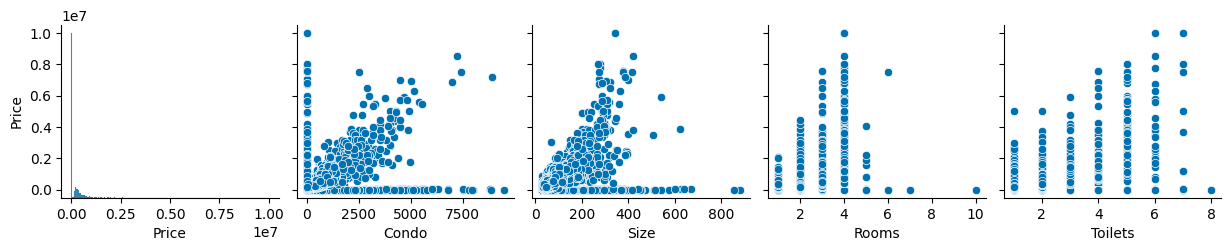

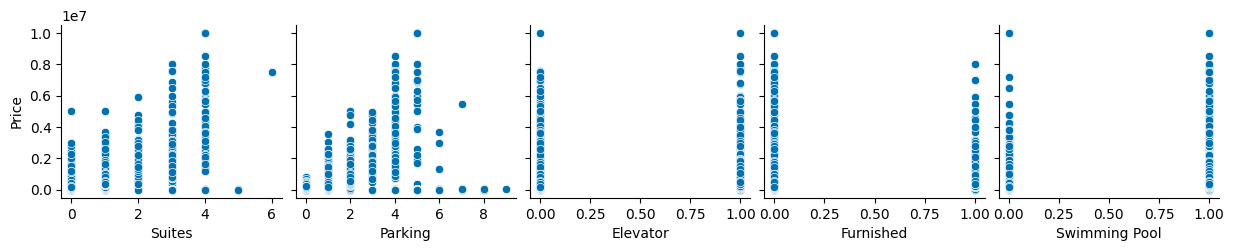

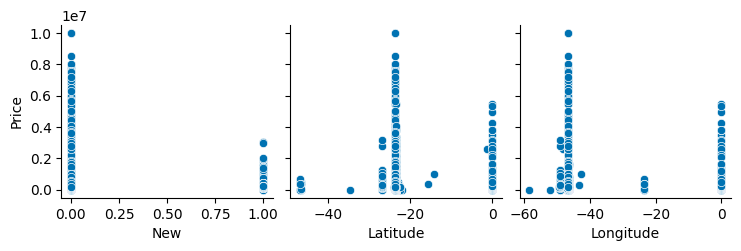

In [10]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                 x_vars=data_num.columns[i:i+5],
                 y_vars=['Price'])

In [11]:
cont_data = data[['Size', 'Condo', 'Price']]
cont_data[cont_data['Price'] < 5] = np.NaN
cont_data[cont_data[['Size', 'Condo']] < 5] = np.NaN
cont_data.dropna(axis=0, inplace=True)

cont_data.shape

(11635, 3)

In [12]:
corr_data = cont_data.corr()['Price'][:-1]
correlated_features_list = corr_data[abs(corr_data) > 0.3].sort_values(ascending=False)
print("There are {} correlated values with Price:\n{}".format(len(correlated_features_list), 
                                                                          correlated_features_list))

There are 2 correlated values with Price:
Size     0.334302
Condo    0.314130
Name: Price, dtype: float64


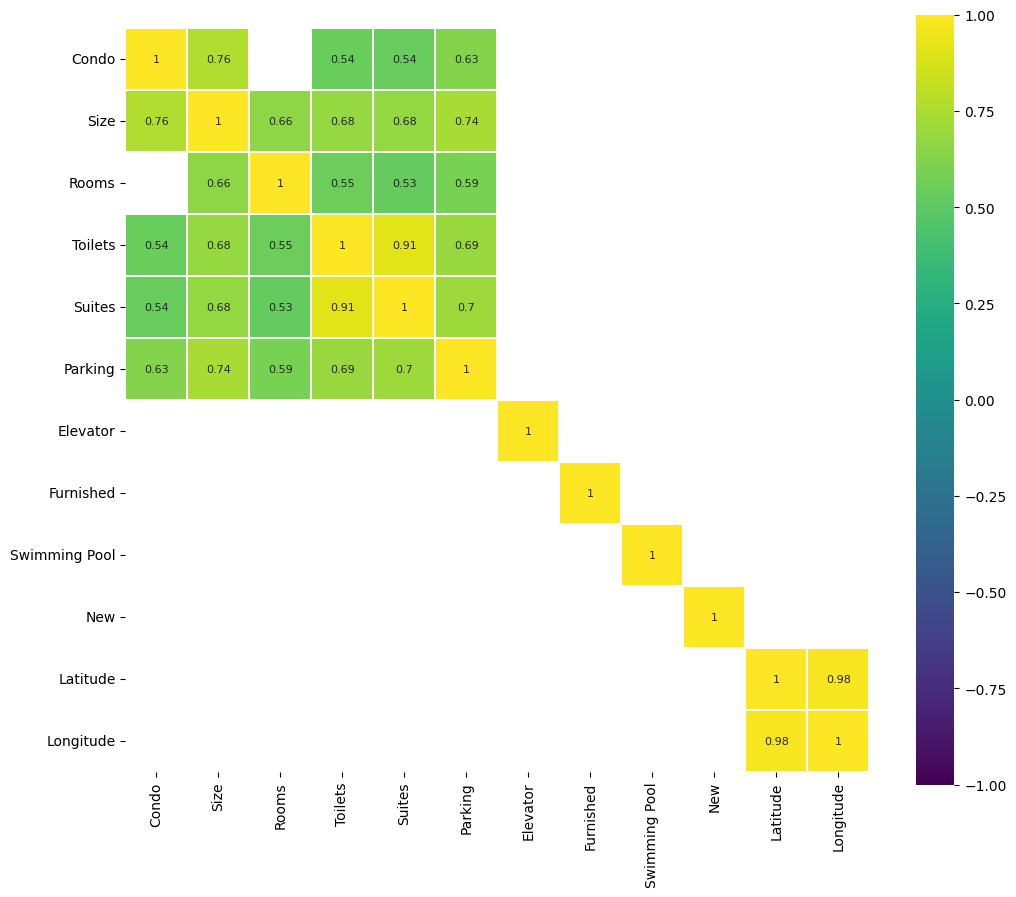

In [13]:
corr = data_num.drop('Price', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [14]:
df_categ = data.select_dtypes(include=['int64', 'O']).drop(['Condo', 'Size'], axis=1)
df_categ.head()

,Price,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type
0,930,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
1,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
2,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
3,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
4,1300,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment


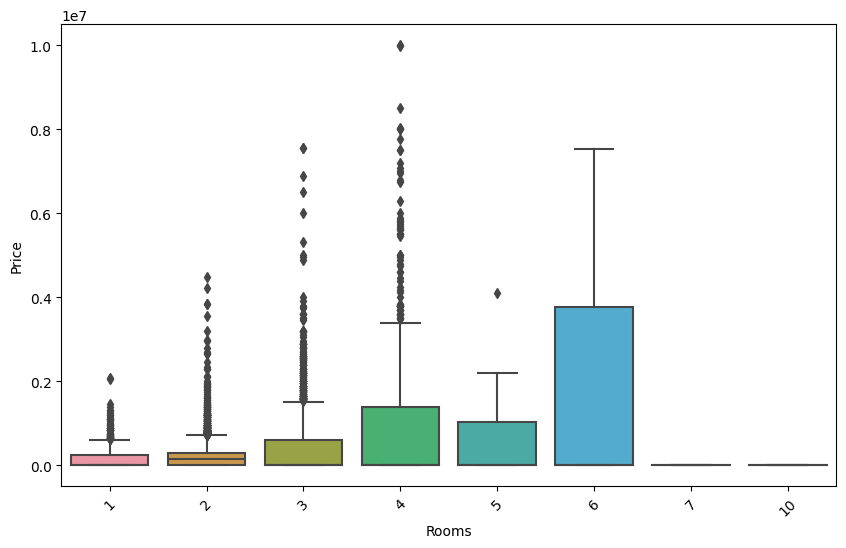

In [15]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Rooms', y='Price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45);

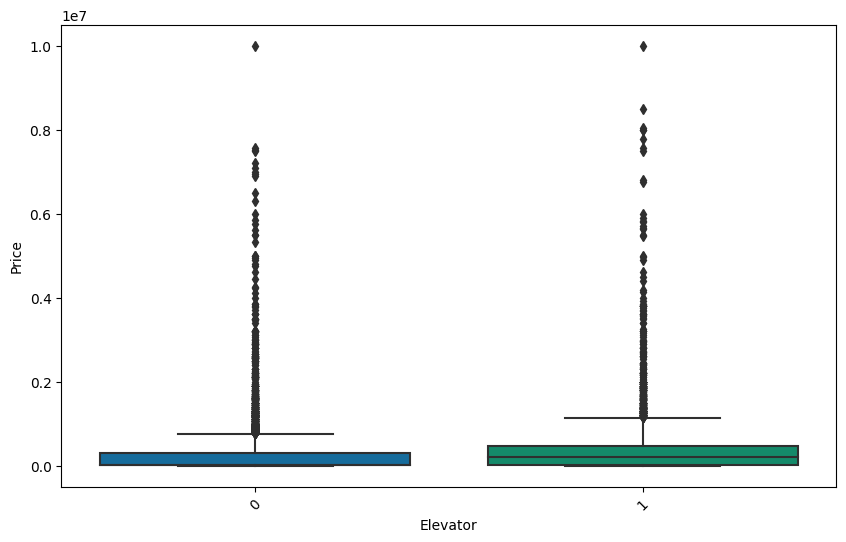

In [16]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Elevator', y='Price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45);

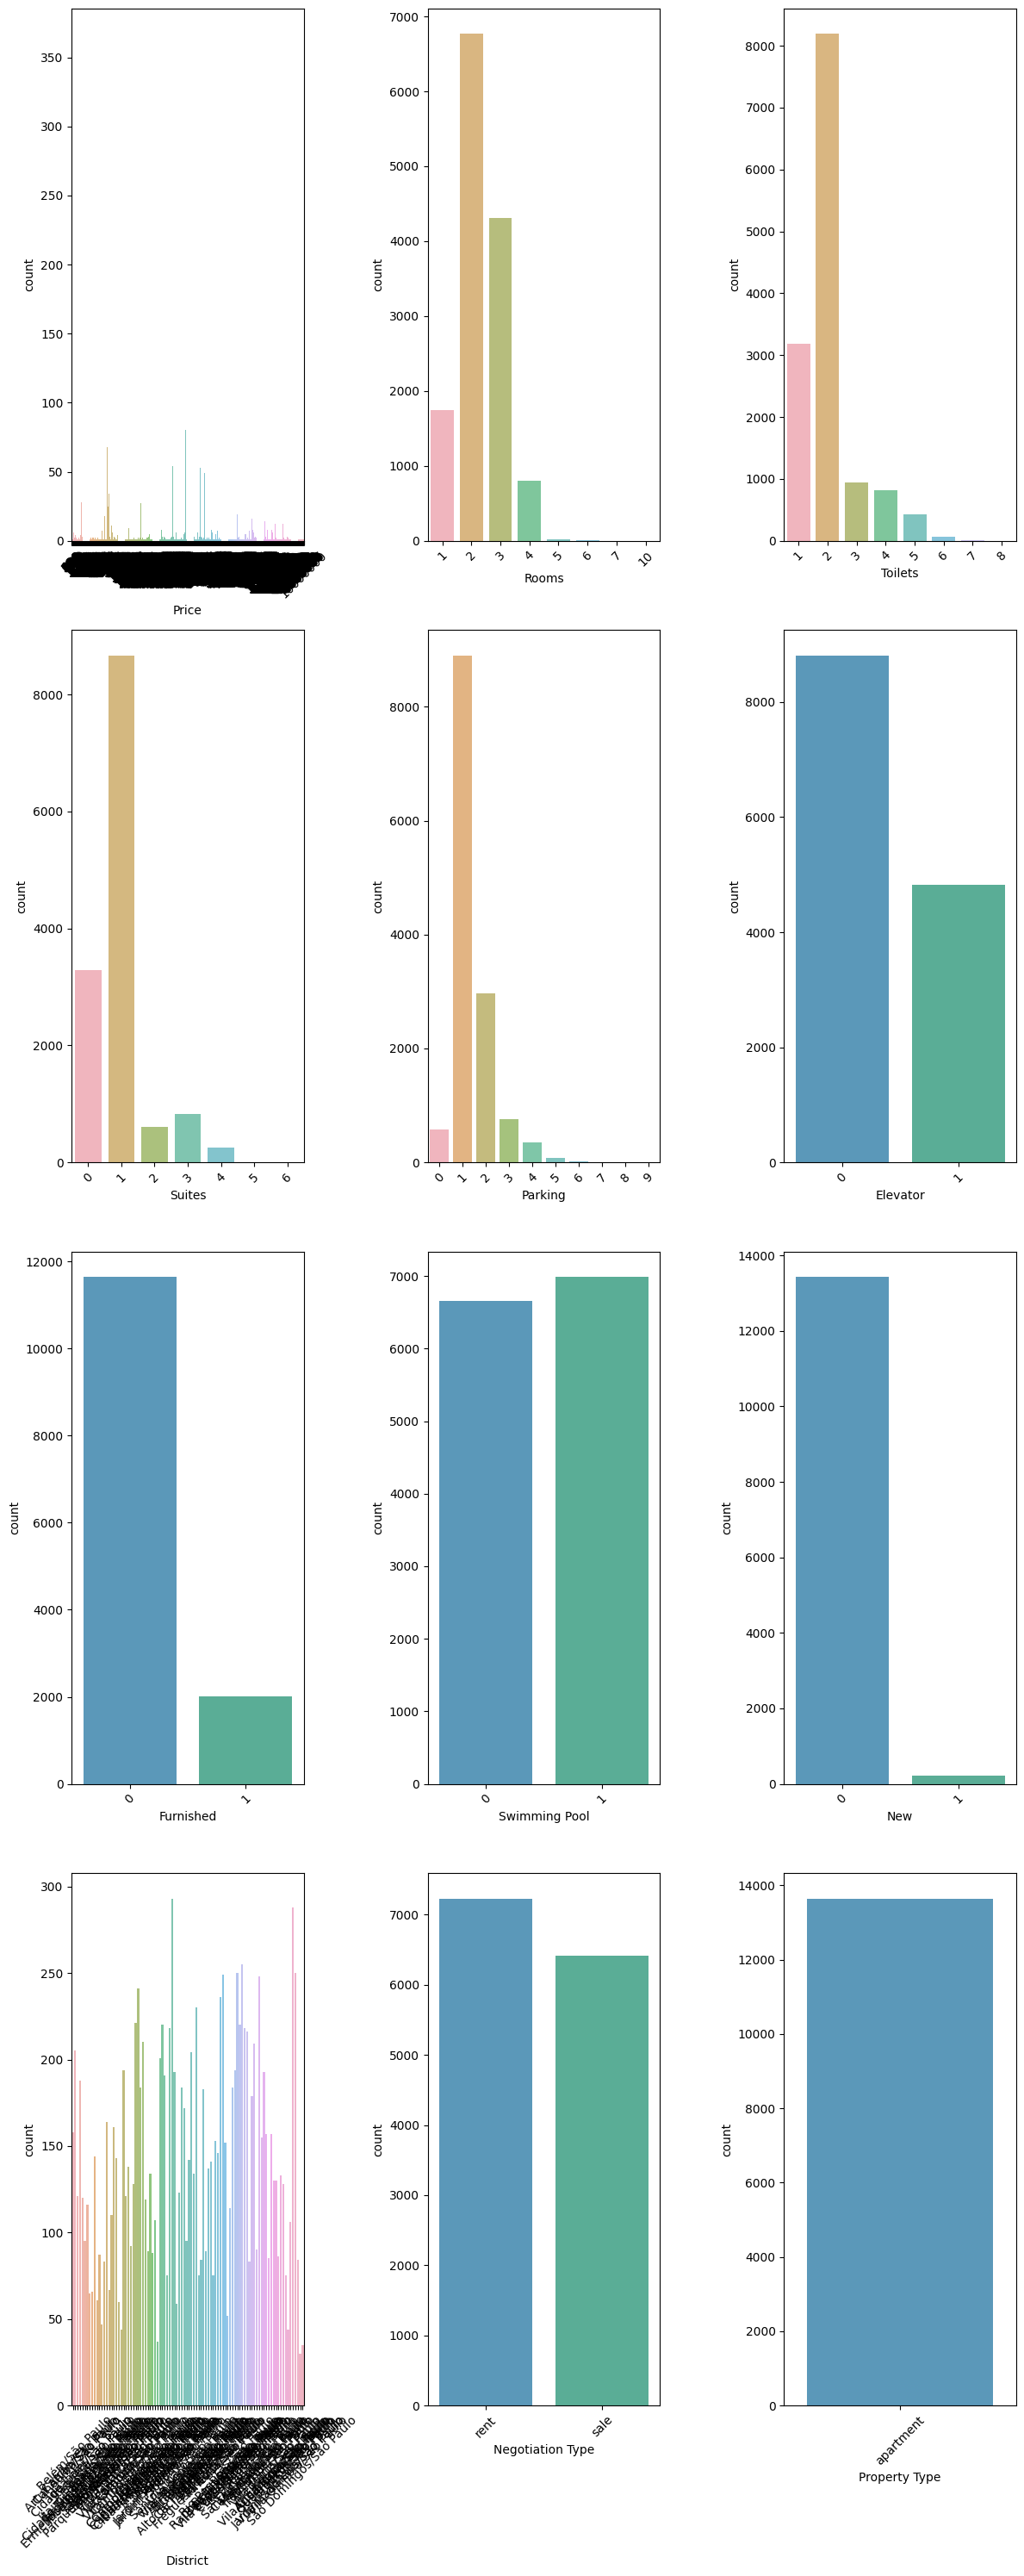

In [17]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_categ.columns[i], alpha=0.7, data=df_categ, ax=ax) 

fig.tight_layout()

In [18]:
data_f = data.drop(['Toilets','Longitude','New','Property Type'], axis =1)
data_f.head()

,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Negotiation Type,Latitude
0,930,220,47,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.543138
1,1000,148,45,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.550239
2,1000,100,48,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.542818
3,1000,200,48,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.547171
4,1300,410,55,2,1,1,1,0,0,Artur Alvim/São Paulo,rent,-23.525025


In [19]:
data_f['District'].value_counts()

Moema/São Paulo              293
Mooca/São Paulo              288
Brás/São Paulo               255
Brooklin/São Paulo           250
Bela Vista/São Paulo         250
                            ... 
Jardim São Luis/São Paulo     44
São Rafael/São Paulo          44
Grajaú/São Paulo              37
São Domingos/São Paulo        35
Perus/São Paulo               30
Name: District, Length: 96, dtype: int64

In [20]:
data_f['Negotiation Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

In [21]:
feature = {"Negotiation Type": {"rent": 1, "sale": 2}}
data_encode = data_f.replace(feature)
data_encode['Negotiation Type'].value_counts()

1    7228
2    6412
Name: Negotiation Type, dtype: int64

In [22]:
data_f["Negotiation Type"] = data_f["Negotiation Type"].astype('category')
data_f["Negotiation Type cat"] = data_f["Negotiation Type"].cat.codes
data_f['Negotiation Type cat'].value_counts()

0    7228
1    6412
Name: Negotiation Type cat, dtype: int64

In [23]:
data_f = data_f.drop('Negotiation Type cat', axis = 1)

In [24]:
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.1 MB/s eta 0:00:00


In [31]:
import category_encoders as ce

In [26]:
data_tmp = data_f.copy()
encoder = ce.BackwardDifferenceEncoder(cols=["District"])
encoder.fit(data_tmp, verbose=1)

BackwardDifferenceEncoder(cols=['District'],
                          mapping=[{'col': 'District',
                                    'mapping':      District_0  District_1  District_2  District_3  District_4  District_5  \
 1    -0.989583   -0.979167    -0.96875   -0.958333   -0.947917     -0.9375   
 2     0.010417   -0.979167    -0.96875   -0.958333   -0.947917     -0.9375   
 3     0.010417    0.020833    -0.96875   -0.958333   -0.947917     -0.9375   
 4     0.010417    0.020833     0.03125   -0.958333   -0.947917     -0.9375   
 5     0.010...
 1     -0.041667     -0.03125    -0.020833    -0.010417  
 2     -0.041667     -0.03125    -0.020833    -0.010417  
 3     -0.041667     -0.03125    -0.020833    -0.010417  
 4     -0.041667     -0.03125    -0.020833    -0.010417  
 5     -0.041667     -0.03125    -0.020833    -0.010417  
..           ...          ...          ...          ...  
 94     0.958333      0.96875    -0.020833    -0.010417  
 95     0.958333      0.96875     0.979167    -0.010417  
 96     0.958333      0.96875     0.979167     0.989583  
-1      0.000000      0.00000     0.000000     0.000000  
-2      0.000000      0.00000     0.000000     0.000000  

[98 rows x 95 columns]}])

In [27]:
data_cat_enc = encoder.fit_transform(data_tmp, verbose=1) # набор данных после кодирования категориальных признаков
data_cat_enc = data_cat_enc.drop('Negotiation Type', axis = 1)
data_cat_enc.head()

,intercept,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_86,District_87,District_88,District_89,District_90,District_91,District_92,District_93,District_94,Latitude
0,1,930,220,47,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.543138
1,1,1000,148,45,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.550239
2,1,1000,100,48,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.542818
3,1,1000,200,48,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.547171
4,1,1300,410,55,2,1,1,1,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.525025


In [28]:
from sklearn.datasets import load_iris, load_diabetes

In [29]:
data = load_diabetes()
x = data.data
y = data.target
columns = data.feature_names

df = pd.DataFrame(x)
df.columns = columns
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


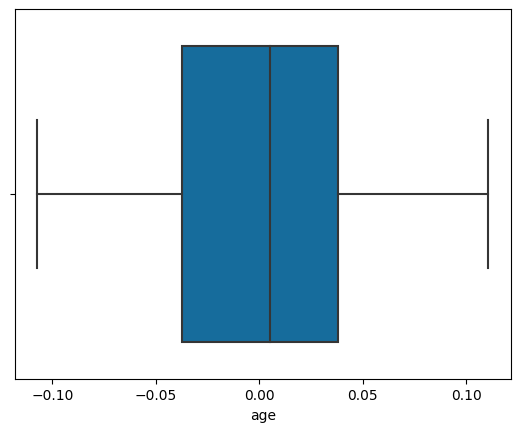

In [32]:
import seaborn as sns
sns.boxplot(x=df['age']);

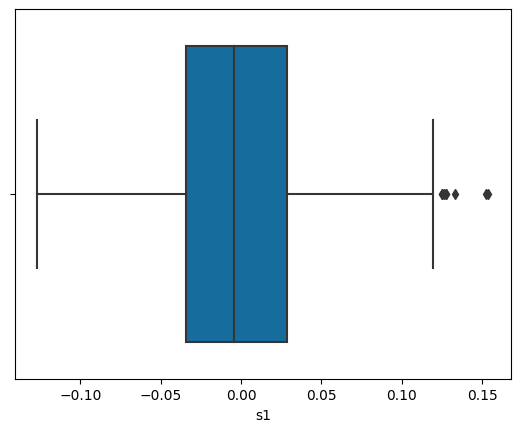

In [33]:
sns.boxplot(x=df['s1']);

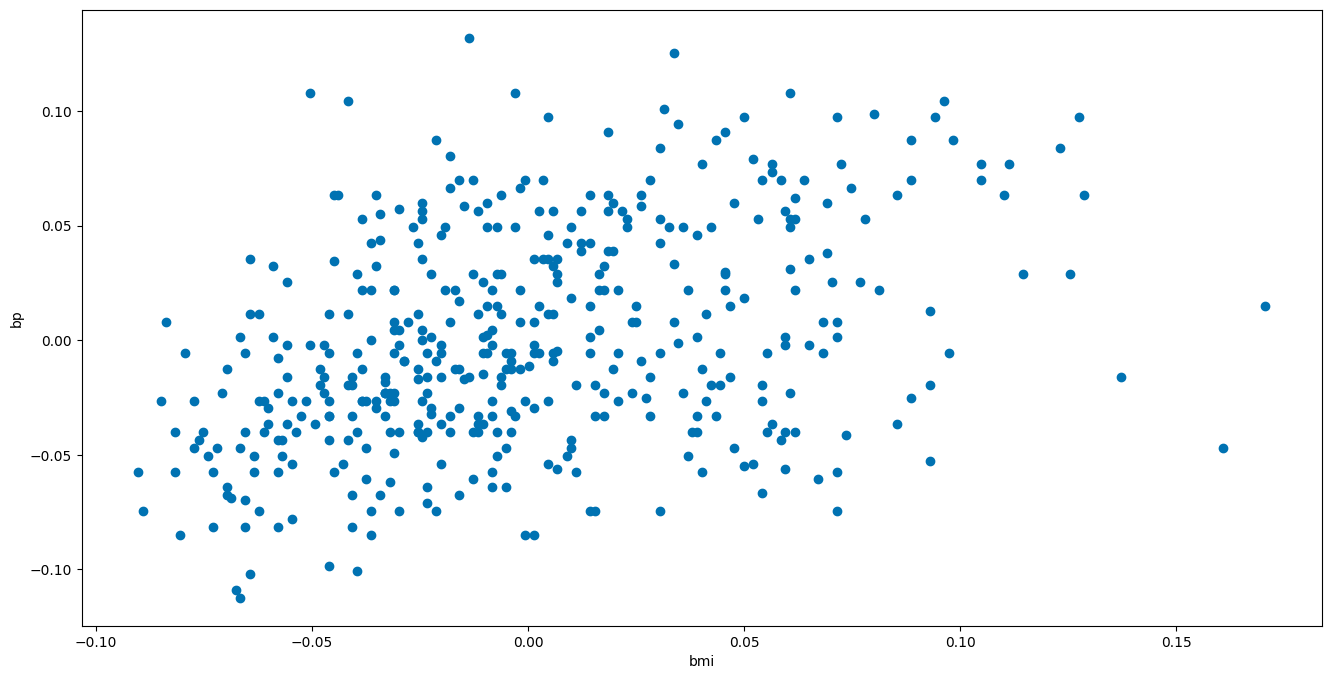

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df['bmi'], df['bp'])
ax.set_xlabel('bmi')
ax.set_ylabel('bp')
plt.show();

In [35]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.800500  1.065488  1.297088  0.459841  0.929746  0.732065  0.912451   
1    0.039567  0.938537  1.082180  0.553505  0.177624  0.402886  1.564414   
2    1.793307  1.065488  0.934533  0.119214  0.958674  0.718897  0.680245   
3    1.872441  0.938537  0.243771  0.770650  0.256292  0.525397  0.757647   
4    0.113172  0.938537  0.764944  0.459841  0.082726  0.327890  0.171178   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.876870  1.065488  0.413360  1.256040  0.119769  0.053957  0.602843   
438  0.115937  1.065488  0.334410  1.422086  1.037341  1.664355  0.602843   
439  0.876870  1.065488  0.334410  0.363573  0.785107  0.290965  0.525441   
440  0.956004  0.938537  0.821235  0.025550  0.343075  0.321306  0.602843   
441  0.956004  0.938537  1.535374  1.711613  1.760535  0.584649  3.654268   

           s4        s5        s6  
0    0.054499  0.418531  0.370989  
1  

In [36]:
threshold = 3
print(np.where(z > 3))

(array([ 58, 123, 123, 123, 216, 230, 230, 256, 260, 261, 269, 322, 336,
       367, 441]), array([6, 4, 5, 7, 7, 4, 5, 2, 6, 6, 6, 7, 7, 2, 6]))


In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age    0.075375
sex    0.095322
bmi    0.065477
bp     0.072300
s1     0.062606
s2     0.060203
s3     0.064429
s4     0.073802
s5     0.065678
s6     0.061096
dtype: float64


In [44]:
iris_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
iris_iqr.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [45]:
iris_iqr[iris_iqr.sum(axis=1) == 1].index

Int64Index([ 35,  58,  84, 117, 141, 168, 169, 202, 245, 256, 260, 261, 269,
            276, 286, 350, 353, 366, 367, 376, 406, 428, 441],
           dtype='int64')

In [47]:
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/diabetes.csv', sep=',') 
data = data.drop(["Outcome"], axis = 1)

In [48]:
data_nan = data.copy()
for i in range(15):
    random_part = data.sample(frac=0.005, axis=0).sample(n=3, axis=1)
    index = random_part.index
    col = random_part.columns[0]
    
    data_nan.loc[index, col] = np.NaN
    
data_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [49]:
data_nan.isna().sum()

Pregnancies                  8
Glucose                      4
BloodPressure                4
SkinThickness                8
Insulin                      8
BMI                          4
DiabetesPedigreeFunction    16
Age                          8
dtype: int64

In [50]:
data_nan.shape

(768, 8)

In [51]:
data_nan.dropna(axis = 0).shape 

(709, 8)

In [52]:
data_nan.dropna(axis = 1).shape

(768, 0)

In [53]:
data_nan.dropna(how = 'all', axis = 0).shape

(768, 8)

In [54]:
data_nan.dropna(thresh = 3).shape

(768, 8)

In [55]:
data_nan.dropna(thresh = 10, axis = 1).shape

(768, 8)

In [56]:
from sklearn.impute import SimpleImputer

sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0) # заполняем 0
data_NA_zero = sumple_imp.fit_transform(data_nan)
data_NA_zero = pd.DataFrame(data_NA_zero, columns = data_nan.columns)
data_NA_zero.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [57]:
data_NA_zero.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'mean') # mean - заполняем среднем, median - заполняем медианой, most_frequent - заполняем модой
data_NA_mean = sumple_imp.fit_transform(data_nan)
data_NA_mean = pd.DataFrame(data_NA_mean, columns = data_nan.columns)
data_NA_mean.head()

In [60]:
data_inter_linear = data_nan.interpolate(method='linear')#.fillna(0)

data_inter_linear.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [61]:
data_inter_linear.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [62]:
datas = [data_NA_zero, data_NA_mean, data_inter_linear]
names = ['zero', 'mean', 'linear']
results = pd.Series(index=names)

for data_, name in zip(datas, names):
    results[name] = np.sqrt(np.mean((data - data_)**2, axis=0).mean()) 

results = results.sort_values(ascending=True)

results

mean      3.631129
linear    4.019726
zero      6.651398
dtype: float64

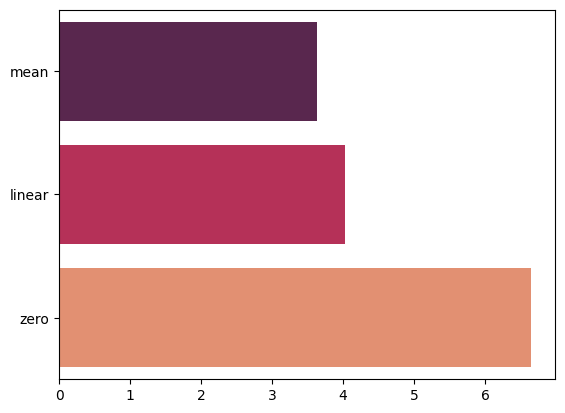

In [63]:
sns.barplot(y=results.index, x=results.values, palette='rocket', orient='h');